In [1]:

# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-4
EPOCHS = 20
BS = 32

In [4]:
DIRECTORY = r"/content/drive/MyDrive/Face-Mask-Detection-master/dataset"
CATEGORIES = ["with_mask", "without_mask"]

# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print("[INFO] loading images...")

data = []
labels = []



[INFO] loading images...


In [5]:
for category in CATEGORIES:
    count=1
    path = os.path.join(DIRECTORY, category)
    #count no of files
    path, dirs, files = next(os.walk(path))
    file_count = len(files)
    for img in os.listdir(path):
      print(count,"/",file_count)
      img_path = os.path.join(path, img)
      image = load_img(img_path, target_size=(224, 224))
      image = img_to_array(image)
      image = preprocess_input(image)
      data.append(image)
      labels.append(category)
      count+=1

1 / 1915
2 / 1915
3 / 1915
4 / 1915
5 / 1915
6 / 1915
7 / 1915
8 / 1915
9 / 1915
10 / 1915
11 / 1915
12 / 1915
13 / 1915
14 / 1915
15 / 1915
16 / 1915
17 / 1915
18 / 1915
19 / 1915
20 / 1915
21 / 1915
22 / 1915
23 / 1915
24 / 1915
25 / 1915
26 / 1915
27 / 1915
28 / 1915
29 / 1915
30 / 1915
31 / 1915
32 / 1915
33 / 1915
34 / 1915
35 / 1915
36 / 1915
37 / 1915
38 / 1915
39 / 1915
40 / 1915
41 / 1915
42 / 1915
43 / 1915
44 / 1915
45 / 1915
46 / 1915
47 / 1915
48 / 1915
49 / 1915
50 / 1915
51 / 1915
52 / 1915
53 / 1915
54 / 1915
55 / 1915
56 / 1915
57 / 1915
58 / 1915
59 / 1915
60 / 1915
61 / 1915
62 / 1915
63 / 1915
64 / 1915
65 / 1915
66 / 1915
67 / 1915
68 / 1915
69 / 1915
70 / 1915
71 / 1915
72 / 1915
73 / 1915
74 / 1915
75 / 1915
76 / 1915
77 / 1915
78 / 1915
79 / 1915
80 / 1915
81 / 1915
82 / 1915
83 / 1915
84 / 1915
85 / 1915
86 / 1915
87 / 1915
88 / 1915
89 / 1915
90 / 1915
91 / 1915
92 / 1915
93 / 1915
94 / 1915
95 / 1915
96 / 1915
97 / 1915
98 / 1915
99 / 1915
100 / 1915
101 / 19

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


674 / 1915
675 / 1915
676 / 1915
677 / 1915
678 / 1915
679 / 1915
680 / 1915
681 / 1915
682 / 1915
683 / 1915
684 / 1915
685 / 1915
686 / 1915
687 / 1915
688 / 1915
689 / 1915
690 / 1915
691 / 1915
692 / 1915
693 / 1915
694 / 1915
695 / 1915
696 / 1915
697 / 1915
698 / 1915
699 / 1915
700 / 1915
701 / 1915
702 / 1915
703 / 1915
704 / 1915
705 / 1915
706 / 1915
707 / 1915
708 / 1915
709 / 1915
710 / 1915
711 / 1915
712 / 1915
713 / 1915
714 / 1915
715 / 1915
716 / 1915
717 / 1915
718 / 1915
719 / 1915
720 / 1915
721 / 1915
722 / 1915
723 / 1915
724 / 1915
725 / 1915
726 / 1915
727 / 1915
728 / 1915
729 / 1915
730 / 1915
731 / 1915
732 / 1915
733 / 1915
734 / 1915
735 / 1915
736 / 1915
737 / 1915
738 / 1915
739 / 1915
740 / 1915
741 / 1915
742 / 1915
743 / 1915
744 / 1915
745 / 1915
746 / 1915
747 / 1915
748 / 1915
749 / 1915
750 / 1915
751 / 1915
752 / 1915
753 / 1915
754 / 1915
755 / 1915
756 / 1915
757 / 1915
758 / 1915
759 / 1915
760 / 1915
761 / 1915
762 / 1915
763 / 1915
764 / 1915

In [6]:
print(labels)

['with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask'

In [7]:
# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
data = np.array(data, dtype="float32")
labels = np.array(labels)

In [8]:
print (labels)
type(labels)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


numpy.ndarray

In [9]:
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.25, stratify=labels, random_state=0)

In [10]:

type(trainX)

numpy.ndarray

In [11]:
# construct the training image generator for data augmentation
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

In [12]:
type(aug)

keras.preprocessing.image.ImageDataGenerator

In [13]:
# load the MobileNetV2 network, ensuring the head FC layer sets are
# left off
baseModel = MobileNetV2(weights="imagenet", include_top=False,
  input_tensor=Input(shape=(224, 224, 3)))

9420800/9406464 [==============================] - 0s 0us/step


In [14]:
type(baseModel)

keras.engine.functional.Functional

In [15]:

# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = MaxPooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

In [16]:
len(baseModel.layers)


154

In [17]:
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

In [18]:
#len(baseModel.layers)
type(headModel)
#type(baseModel)

keras.engine.keras_tensor.KerasTensor

In [19]:
# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

[INFO] compiling model...


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [20]:
#model.summary()

In [21]:
# train the head of the network
print("[INFO] training head...")
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	validation_data=(testX, testY),
	epochs=EPOCHS)

[INFO] training head...
Epoch 1/20
90/90 [==============================] - 51s 421ms/step - loss: 0.8297 - accuracy: 0.7717 - val_loss: 0.1413 - val_accuracy: 0.9645
Epoch 2/20
90/90 [==============================] - 32s 352ms/step - loss: 0.2264 - accuracy: 0.9283 - val_loss: 0.0994 - val_accuracy: 0.9739
Epoch 3/20
90/90 [==============================] - 33s 365ms/step - loss: 0.1720 - accuracy: 0.9384 - val_loss: 0.0809 - val_accuracy: 0.9760
Epoch 4/20
90/90 [==============================] - 32s 351ms/step - loss: 0.1258 - accuracy: 0.9596 - val_loss: 0.0782 - val_accuracy: 0.9698
Epoch 5/20
90/90 [==============================] - 32s 352ms/step - loss: 0.1136 - accuracy: 0.9635 - val_loss: 0.0637 - val_accuracy: 0.9791
Epoch 6/20
90/90 [==============================] - 32s 354ms/step - loss: 0.1004 - accuracy: 0.9628 - val_loss: 0.0597 - val_accuracy: 0.9802
Epoch 7/20
90/90 [==============================] - 33s 362ms/step - loss: 0.0901 - accuracy: 0.9711 - val_loss: 0.062

In [22]:
H.history

{'accuracy': [0.7717466950416565,
  0.9283229112625122,
  0.9384133815765381,
  0.9596381187438965,
  0.9634655714035034,
  0.9627696871757507,
  0.9711204171180725,
  0.9693806767463684,
  0.9697285890579224,
  0.9777314066886902,
  0.97633957862854,
  0.9756436944007874,
  0.9787752032279968,
  0.9794711470603943,
  0.9829505681991577,
  0.9829505681991577,
  0.982254683971405,
  0.982254683971405,
  0.9836465120315552,
  0.9857341647148132],
 'loss': [0.829729437828064,
  0.22638650238513947,
  0.17197760939598083,
  0.12583322823047638,
  0.11355193704366684,
  0.10038111358880997,
  0.09010365605354309,
  0.0884069949388504,
  0.0827924981713295,
  0.06960218399763107,
  0.06367518752813339,
  0.06729675829410553,
  0.05750611796975136,
  0.06120280548930168,
  0.058896504342556,
  0.048296164721250534,
  0.05757589265704155,
  0.04948964715003967,
  0.05439402163028717,
  0.0443553663790226],
 'val_accuracy': [0.9645463824272156,
  0.9739311933517456,
  0.9760167002677917,
  0.96

In [23]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)

[INFO] evaluating network...


In [24]:

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)


In [25]:
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))


              precision    recall  f1-score   support

   with_mask       0.98      0.99      0.98       479
without_mask       0.99      0.98      0.98       480

    accuracy                           0.98       959
   macro avg       0.98      0.98      0.98       959
weighted avg       0.98      0.98      0.98       959



In [26]:
# serialize the model to disk
print("[INFO] saving mask detector model...")
model.save("/content/drive/MyDrive/Face-Mask-Detection-master/mask_detector.model", save_format="h5")


[INFO] saving mask detector model...


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


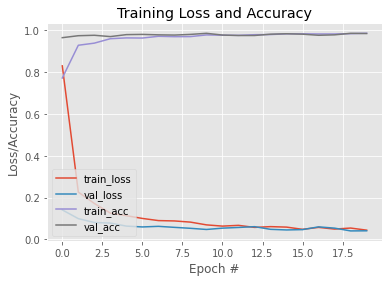

In [27]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")


In [28]:
plt.savefig("/content/drive/MyDrive/Face-Mask-Detection-master/plot.png")

<Figure size 432x288 with 0 Axes>